# **Lab 4: Recurrent Neural Network**

The lab report will be due by **April 14th, 2023**. 

**Requirement: Please submit the ipynb file of your lab via the link in Brightspace.**

##**Problem 1**
In this problem, we will explore the application of  Long Short-Term Memory (LSTM) for a one-step forecasting task on the time-series data. The associated training and testing data are given in Data_Lab4_1_train.csv and Data_Lab4_1_test.csv. Your task is to predict the value of the signal at the next time step based on your current and previous observations of the signal. The length of the time window for your observation is 5 time steps. You are asked to develop a LSTM-based recurrent neural network (RNN) algorithm complete the forecast task, respectively. You have the full freedom to design the algorithm.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imported libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Conv1D, MaxPooling1D, Bidirectional, GRU
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#imported Data
testData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNIT 483/Labs/Lab4/Data_Lab4_1_test.csv')
x_test = testData[['x_test_0','x_test_1','x_test_2', 'x_test_3', 'x_test_4']]
y_test = testData['y_test']

trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNIT 483/Labs/Lab4/Data_Lab4_1_train.csv')
x_train = trainData[['x_train_0','x_train_1','x_train_2', 'x_train_3', 'x_train_4']]
y_train = trainData['y_train']

In [ ]:
# Build LSTM model
model = Sequential()
embedding_vector_length = 32
model.add(layers.Normalization(input_shape=(5,1), axis = None))
model.add(LSTM(25))
model.add(Dense(1))
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliza  (None, 5, 1)             3         
 tion)                                                           
                                                                 
 lstm_15 (LSTM)              (None, 25)                2700      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,729
Trainable params: 2,726
Non-trainable params: 3
_________________________________________________________________
None


In [ ]:
# Compile and train the learning model
adam = optimizers.Adam(lr=0.05)
model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, batch_size=32)

Epoch 1/500
5/5 [==============================] - 3s 119ms/step - loss: 0.5771 - mean_squared_error: 0.5771 - val_loss: 0.4760 - val_mean_squared_error: 0.4760
Epoch 2/500
5/5 [==============================] - 0s 16ms/step - loss: 0.5749 - mean_squared_error: 0.5749 - val_loss: 0.4747 - val_mean_squared_error: 0.4747
Epoch 3/500
5/5 [==============================] - 0s 15ms/step - loss: 0.5730 - mean_squared_error: 0.5730 - val_loss: 0.4729 - val_mean_squared_error: 0.4729
Epoch 4/500
5/5 [==============================] - 0s 17ms/step - loss: 0.5716 - mean_squared_error: 0.5716 - val_loss: 0.4717 - val_mean_squared_error: 0.4717
Epoch 5/500
5/5 [==============================] - 0s 25ms/step - loss: 0.5712 - mean_squared_error: 0.5712 - val_loss: 0.4706 - val_mean_squared_error: 0.4706
Epoch 6/500
5/5 [==============================] - 0s 14ms/step - loss: 0.5703 - mean_squared_error: 0.5703 - val_loss: 0.4700 - val_mean_squared_error: 0.4700
Epoch 7/500
5/5 [======================

5/5 - 0s - loss: 0.1576 - mean_squared_error: 0.1576 - 30ms/epoch - 6ms/step
0.1575598418712616


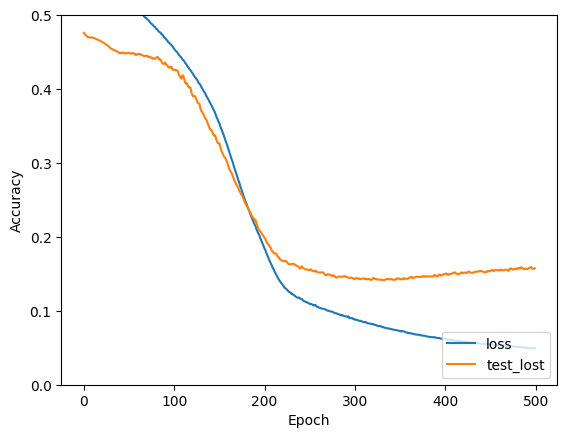

In [ ]:
# Evaluate the learning Model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'test_lost')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, .5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 2**
In this problem, we will explore the application of Gated Recurrent Unit (GRU) for the same one-step forecasting task stated in Problem 1. You are asked to develop a GRU-based RNN algorithm complete the forecast task, respectively. You have the full freedom to design the algorithm.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors.  

In [ ]:
#imported Data
testData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNIT 483/Labs/Lab4/Data_Lab4_1_test.csv')
x_test = testData[['x_test_0','x_test_1','x_test_2', 'x_test_3', 'x_test_4']]
y_test = testData['y_test']

trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNIT 483/Labs/Lab4/Data_Lab4_1_train.csv')
x_train = trainData[['x_train_0','x_train_1','x_train_2', 'x_train_3', 'x_train_4']]
y_train = trainData['y_train']

In [ ]:
# Build GRU model
model = Sequential()
model.add(layers.Normalization(input_shape=(5,1), axis = None))
model.add(GRU(25))
model.add(Dense(1))
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliza  (None, 5, 1)             3         
 tion)                                                           
                                                                 
 gru_4 (GRU)                 (None, 25)                2100      
                                                                 
 dense_12 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,129
Trainable params: 2,126
Non-trainable params: 3
_________________________________________________________________
None


In [ ]:
# Compile and train the learning model
adam = optimizers.Adam(lr=0.05)
model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, batch_size=32)

Epoch 1/500
5/5 [==============================] - 3s 112ms/step - loss: 0.5819 - mean_squared_error: 0.5819 - val_loss: 0.4817 - val_mean_squared_error: 0.4817
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 0.5794 - mean_squared_error: 0.5794 - val_loss: 0.4785 - val_mean_squared_error: 0.4785
Epoch 3/500
5/5 [==============================] - 0s 13ms/step - loss: 0.5765 - mean_squared_error: 0.5765 - val_loss: 0.4768 - val_mean_squared_error: 0.4768
Epoch 4/500
5/5 [==============================] - 0s 13ms/step - loss: 0.5751 - mean_squared_error: 0.5751 - val_loss: 0.4756 - val_mean_squared_error: 0.4756
Epoch 5/500
5/5 [==============================] - 0s 13ms/step - loss: 0.5738 - mean_squared_error: 0.5738 - val_loss: 0.4747 - val_mean_squared_error: 0.4747
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 0.5736 - mean_squared_error: 0.5736 - val_loss: 0.4741 - val_mean_squared_error: 0.4741
Epoch 7/500
5/5 [======================

5/5 - 0s - loss: 0.1874 - mean_squared_error: 0.1874 - 42ms/epoch - 8ms/step
0.1874304562807083


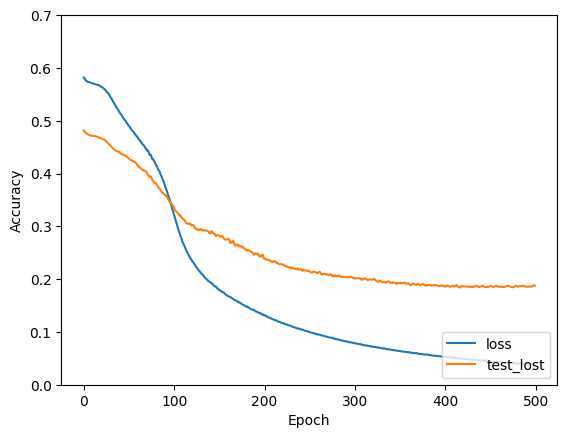

In [ ]:
# Evaluate the learning Model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'test_lost')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, .7])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 3**
In this problem, we will explore to the application of RNN in one-step stock forecasting. The stock-related data is given in Data_Lab4_3.csv. Your task is to use the current and previous observations on the close price to predict the future close price. The length of the time window for current and previous observations is 5. You can use either LSTM-based RNN algorithm or GRU-based RNN algorithm to complete this task. You have the full freedom to design the algorithm. To simplify your task, the raw stock-related data has been preprocessed to prepare the training and testing datasets that are given in Data_Lab4_3_train.csv and Data_Lab4_3_test.csv. 

Requirments: 
*   You need to include the following three components in your lab report: (1) selection between LSTM-based or GRU-based RNN algorithm, (2) the codes, (3) the obtained training errors, and (4) the obtained testing errors. 

In [ ]:
#imported Data
testData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNIT 483/Labs/Lab4/Data_Lab4_3_test.csv')
x_test = testData[['x_test_0','x_test_1','x_test_2', 'x_test_3', 'x_test_4']]
y_test = testData['y_test']

trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNIT 483/Labs/Lab4/Data_Lab4_3_train.csv')
x_train = trainData[['x_train_0','x_train_1','x_train_2', 'x_train_3', 'x_train_4']]
y_train = trainData['y_train']

In [ ]:
# Built LSTM model
model = Sequential()
model.add(layers.Normalization(input_shape=(5,1), axis = None))
model.add(LSTM(100))
model.add(Dense(1))
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliza  (None, 5, 1)             3         
 tion)                                                           
                                                                 
 lstm_16 (LSTM)              (None, 100)               40800     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,904
Trainable params: 40,901
Non-trainable params: 3
_________________________________________________________________
None


In [ ]:
# Compile and train the learning model
adam = optimizers.Adam(lr=0.05)
model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
5/5 [==============================] - 3s 127ms/step - loss: 0.7578 - mean_squared_error: 0.7578 - val_loss: 3.7614 - val_mean_squared_error: 3.7614
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 0.4352 - mean_squared_error: 0.4352 - val_loss: 1.7250 - val_mean_squared_error: 1.7250
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.1954 - mean_squared_error: 0.1954 - val_loss: 0.3239 - val_mean_squared_error: 0.3239
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.2472 - val_mean_squared_error: 0.2472
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 7/50
5/5 [=============================

20/20 - 0s - loss: 0.0306 - mean_squared_error: 0.0306 - 64ms/epoch - 3ms/step
0.030620386824011803


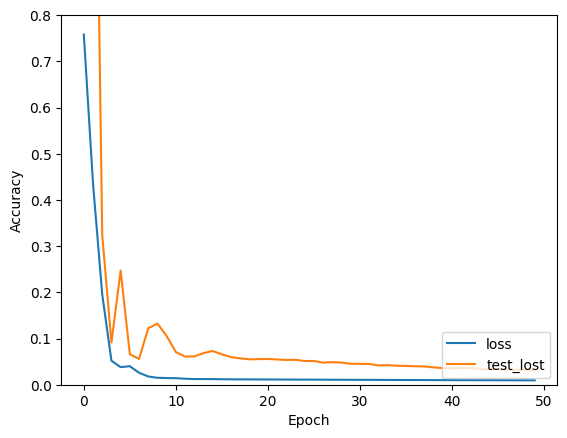

In [ ]:
# Evaluate the learning Model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'test_lost')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, .8])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 4**
In this problem, we will explore the application of GRU for sentiment analysis for movie views in the IMDB dataset. Your task is to develop a GRU-based RNN algorithm for complete the task. You have full freedom to design the algorithm.

*Hint*: Considering this task needs some natural language processing-related technique, a tutorial related to this problem has been provided in class and can be found in Brightspace.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors.

In [ ]:
# load the dataset 
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
# truncate and pad input sequences to ensure the vectors have the same length 
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [ ]:
# Build GRU
model = Sequential()
embedding_vecor_length = 32 
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(GRU(50)) 
model.add(Dense(1))
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 gru_5 (GRU)                 (None, 50)                12600     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 172,651
Trainable params: 172,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile and train the learning model
adam = optimizers.Adam(lr=0.01)  
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=128)

Epoch 1/3
196/196 [==============================] - 33s 155ms/step - loss: 0.4662 - accuracy: 0.8204 - val_loss: 0.5505 - val_accuracy: 0.7962
Epoch 2/3
196/196 [==============================] - 17s 88ms/step - loss: 0.4597 - accuracy: 0.8191 - val_loss: 0.5917 - val_accuracy: 0.7517
Epoch 3/3
196/196 [==============================] - 14s 71ms/step - loss: 0.4636 - accuracy: 0.7864 - val_loss: 0.5363 - val_accuracy: 0.7608


782/782 - 7s - loss: 0.5363 - accuracy: 0.7608 - 7s/epoch - 8ms/step
0.7608399987220764


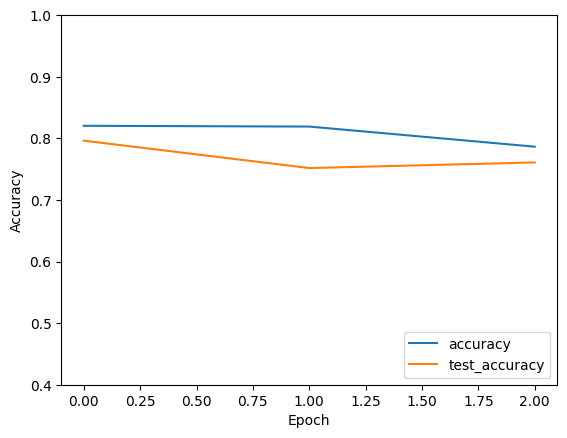

In [ ]:
# Evaluate the learning Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)